In [57]:
import pandas as pd
import os
import matplotlib.pyplot as plt

In [58]:
ROOT = "C:/Users/Beau/Documents/GitHub/RealEstate"
CLEANED = os.path.join(ROOT, "data", "processed")

In [59]:
df = pd.read_pickle(os.path.join(CLEANED, "Business_Licenses.pkl"))

In [60]:
df.head()

,LICENSE ID,LEGAL NAME,DOING BUSINESS AS NAME,ADDRESS,ZIP CODE,WARD,PRECINCT,POLICE DISTRICT,LICENSE DESCRIPTION,BUSINESS ACTIVITY,LICENSE NUMBER,APPLICATION TYPE,LICENSE TERM START DATE,DATE ISSUED,SSA,LATITUDE,LONGITUDE,issue_day,issue_month,issue_year
2,2796409,J & H DESIGNS INC.,DCI Furniture,2729 W DEVON AVE,60659,50.0,NaN,NaN,Limited Business License,Retail Sales of Carpet and/or Furniture,2712733.0,RENEW,08/16/2021,2022-05-11,43.0,41.997472,-87.698365,11,5,2022
33,2857496,TTX COMPANY,TTX COMPANY,4016 S ASHLAND AVE,60609,12.0,19.0,9.0,Limited Business License,Miscellaneous Commercial Services,2617269.0,RENEW,09/16/2022,2022-08-08,NaN,41.820285,-87.665397,8,8,2022
34,2652692,JYM INVESTMENTS LLC,WINGMAN,2321 W HOWARD ST 1ST,60645,49.0,21.0,24.0,Retail Food Establishment,Sale of Food Prepared Onsite With Dining Area,2652692.0,ISSUE,12/17/2020,2020-12-17,NaN,42.019413,-87.688628,17,12,2020
35,2739788,LEOPARDO COMPANIES INC.,Leopardo Companies Inc,210 N CARPENTER ST 3RD FLOOR,60607,27.0,NaN,NaN,Limited Business License,Administrative Commercial Office,2647849.0,RENEW,09/16/2020,2020-08-21,NaN,41.885945,-87.653462,21,8,2020
36,2842924,"1021 MONTROSE, L.L.C.",Driftwood,1021 W MONTROSE AVE,60613,46.0,9.0,19.0,Tavern,Tavern - Consumption of Liquor on Premise,1579838.0,RENEW,06/16/2022,2022-05-11,34.0,41.961655,-87.655650,11,5,2022


In [26]:
# limit to new businesses
df = df.loc[df["APPLICATION TYPE"] == "ISSUE"]

<AxesSubplot: >

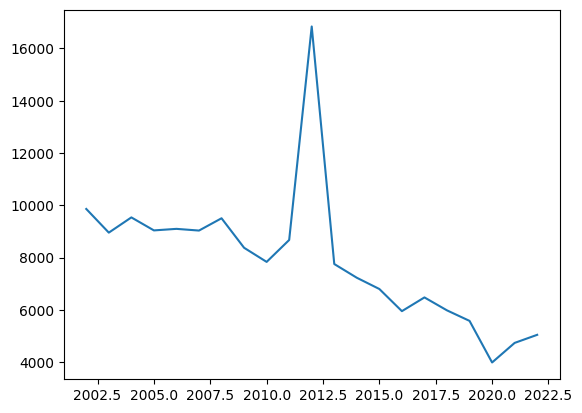

In [32]:
df.issue_year.value_counts().sort_index().plot()
# why is this indicating fewer new business licenses each year? is this bad data?

In [31]:
# remove latitudes South of 41.81578010876936
df = df.loc[df["LATITUDE"] > 41.81578010876936]

In [48]:
grid = (
    df.groupby(["ZIP CODE", "issue_year"])["LICENSE ID"]
    .count()
    .reset_index()
    .pivot(index="ZIP CODE", columns="issue_year", values="LICENSE ID")
    .dropna()
)

In [51]:
grid

issue_year,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
ZIP CODE,,,,,,,,,,,,,,,,,,,,,
60601,183.0,161.0,157.0,286.0,216.0,237.0,402.0,209.0,175.0,267.0,...,223.0,203.0,209.0,161.0,151.0,148.0,103.0,60.0,128.0,114.0
60602,99.0,90.0,118.0,113.0,98.0,145.0,243.0,188.0,144.0,139.0,...,128.0,185.0,175.0,99.0,116.0,113.0,80.0,40.0,53.0,51.0
60603,113.0,119.0,101.0,144.0,127.0,123.0,200.0,102.0,116.0,86.0,...,102.0,170.0,115.0,122.0,85.0,76.0,67.0,50.0,49.0,112.0
60604,83.0,71.0,64.0,93.0,55.0,159.0,211.0,133.0,138.0,51.0,...,57.0,79.0,71.0,78.0,45.0,92.0,91.0,41.0,18.0,35.0
60605,152.0,126.0,150.0,128.0,121.0,182.0,256.0,189.0,178.0,163.0,...,163.0,146.0,116.0,118.0,136.0,116.0,150.0,77.0,80.0,96.0
60606,210.0,148.0,137.0,216.0,176.0,206.0,549.0,209.0,179.0,162.0,...,160.0,166.0,156.0,102.0,137.0,150.0,139.0,71.0,98.0,114.0
60607,260.0,196.0,259.0,185.0,215.0,296.0,263.0,241.0,270.0,308.0,...,325.0,353.0,305.0,317.0,296.0,257.0,268.0,206.0,205.0,271.0
60608,498.0,408.0,342.0,379.0,456.0,450.0,440.0,432.0,439.0,389.0,...,370.0,352.0,344.0,281.0,338.0,323.0,271.0,180.0,214.0,215.0
60609,159.0,133.0,203.0,242.0,377.0,251.0,199.0,165.0,183.0,86.0,...,90.0,95.0,64.0,76.0,92.0,78.0,53.0,426.0,265.0,188.0


<AxesSubplot: xlabel='issue_year'>

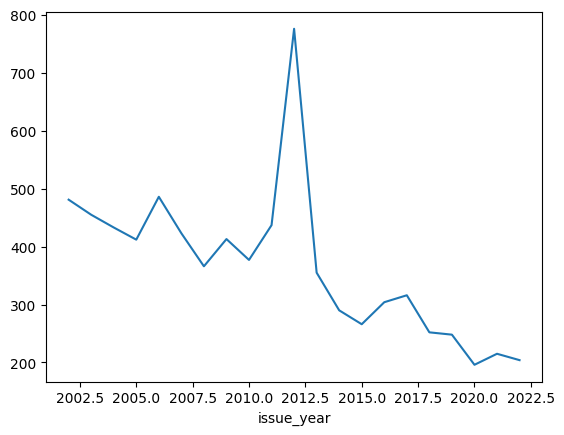

In [53]:
grid.loc[60647].plot()